In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio
import pyccl as ccl
from scipy.optimize import minimize
import emcee
import corner
import astropy.cosmology
import astropy.units as u
from chainconsumer import ChainConsumer
import pickle
import pandas as pd
import sacc
from scipy.stats import norm
from numpy.random import normal
from helper_functions import *

# Load data

In [2]:
ben_vector = load_sacc('sacc_cosmoDC2_i_lt_24p0_txpipebin_wcov.sacc')
judit_vector = load_sacc('TXPipe_sacc/summary_statistics_real.sacc')

/opt/anaconda3/envs/blending/lib/python3.10/site-packages/sacc/sacc.py:378: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you "


# Define Model

In [3]:
def model(pars, data, nz_out):
    Omega_m, Omega_b, n_s, h, b1, b2, b3, b4, b5 = pars
    b = np.array([b1, b2, b3, b4, b5,])
    cosmo = ccl.Cosmology(Omega_b=Omega_b, Omega_c=Omega_m-Omega_b, n_s=n_s, h=h, sigma8=0.8)
    return model_ccl_helper(data, b, nz_out, cosmo)

In [4]:
txp_angles = [42.81, 26.93, 20.21, 16.52, 14.21]
parnames = ['$\\Omega_m$', '$\\Omega_b$', '$n_s$', '$h$',
            '$b_1$', '$b_2$', '$b_3$', '$b_4$', '$b_5$',]

In [5]:
# True cosmology, and best-fit biases from Judit's paper
parr = [0.265, 0.0448, 0.963, 0.71, 0.87, 1.02, 1.19, 1.30, 1.54]

# Debug

In [6]:
# I'm going to try to manually calculate the Chi2 for the first redshift bin...
# Generate a model using true cosmology, Ben data, and Ben N(z)
wmod = model(parr, ben_vector[0], ben_vector[1])
masks, inv_cov = preprocess(ben_vector, txp_angles)

# Compute Chi2 from my data vector:
print('Chi2 for Ben data vector:', np.einsum(
        "i, ij, j",
        ben_vector[0][f"w_0"][masks[0]] - wmod[0][masks[0]],
        inv_cov[0],
        ben_vector[0][f"w_0"][masks[0]] - wmod[0][masks[0]],))
# Compute Chi2 from Judit's data vector, using the same model, covariance, and masks:
print('Chi2 for Judit data vector', np.einsum(
        "i, ij, j",
        judit_vector[0][f"w_0"][masks[0]] - wmod[0][masks[0]],
        inv_cov[0],
        judit_vector[0][f"w_0"][masks[0]] - wmod[0][masks[0]],))

Chi2 for Ben data vector: 14.036597495944465
Chi2 for Judit data vector 1.0983574150657158


/Users/Ben/Desktop/Blending Project/helper_functions.py:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  inv_cov = np.array(


In [7]:
print('Ben data vector - model', ben_vector[0][f"w_0"][masks[0]] - wmod[0][masks[0]])
print(' ')
print('Judit data vector - model', judit_vector[0][f"w_0"][masks[0]] - wmod[0][masks[0]])

Ben data vector - model 12    0.000508
13    0.000535
14    0.000082
15    0.000474
16   -0.000434
17   -0.000708
18    0.000315
19    0.000159
Name: w_0, dtype: float64
 
Judit data vector - model 12   -0.001247
13   -0.000868
14   -0.000591
15   -0.000364
16   -0.000333
17   -0.000280
18    0.000072
19    0.000148
Name: w_0, dtype: float64


Fitting custom parameters.
Best Fits: [0.265  0.0448 0.963  0.71   0.87   1.02   1.19   1.3    1.54  ]


/Users/Ben/Desktop/Blending Project/helper_functions.py:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  inv_cov = np.array(


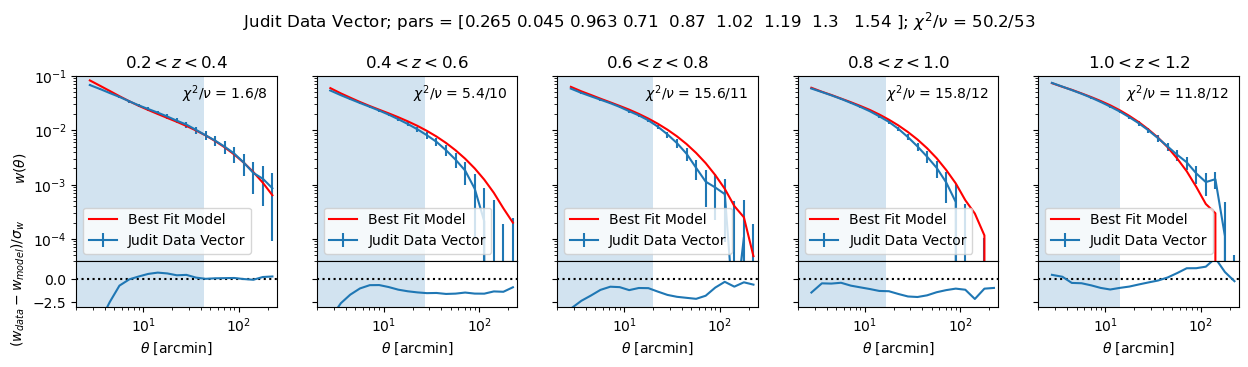

Fitting custom parameters.
Best Fits: [0.265  0.0448 0.963  0.71   0.87   1.02   1.19   1.3    1.54  ]


/Users/Ben/Desktop/Blending Project/helper_functions.py:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  inv_cov = np.array(


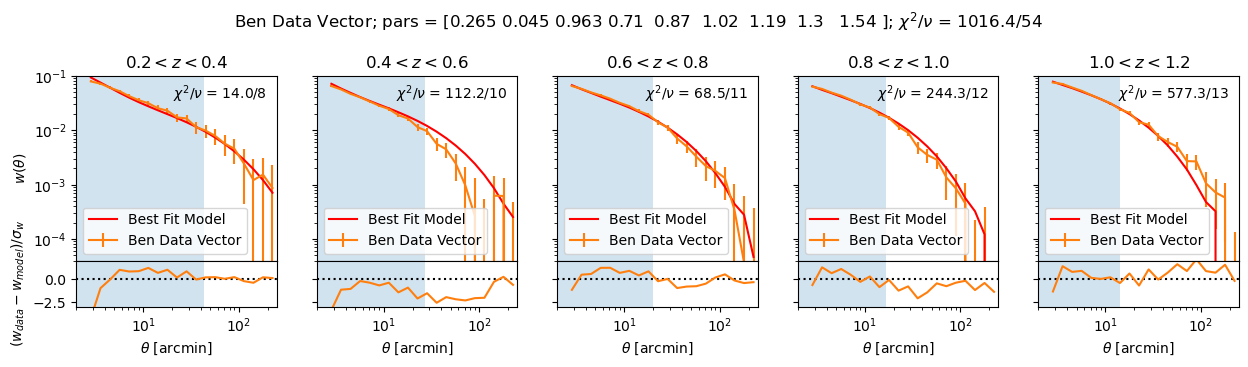

Fitting custom parameters.
Best Fits: [0.265  0.0448 0.963  0.71   0.87   1.02   1.19   1.3    1.54  ]


/Users/Ben/Desktop/Blending Project/helper_functions.py:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  inv_cov = np.array(


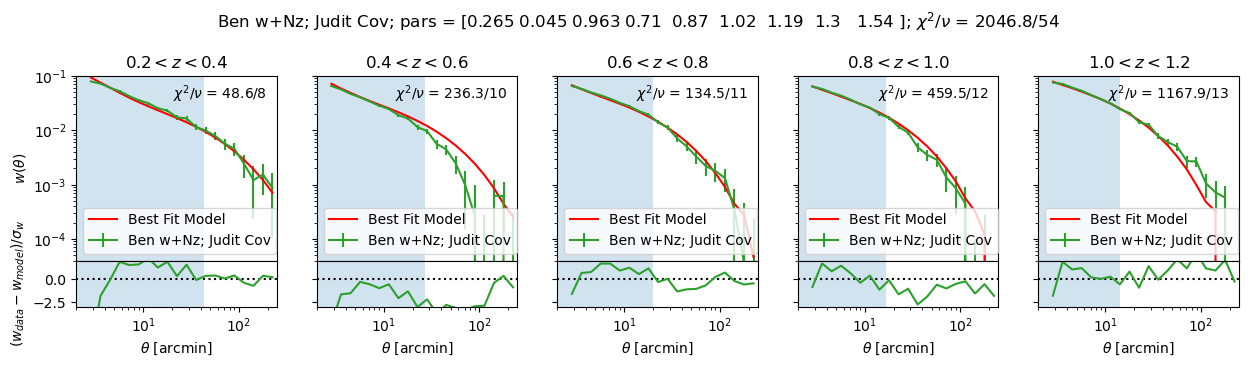

Fitting custom parameters.
Best Fits: [0.265  0.0448 0.963  0.71   0.87   1.02   1.19   1.3    1.54  ]


/Users/Ben/Desktop/Blending Project/helper_functions.py:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  inv_cov = np.array(


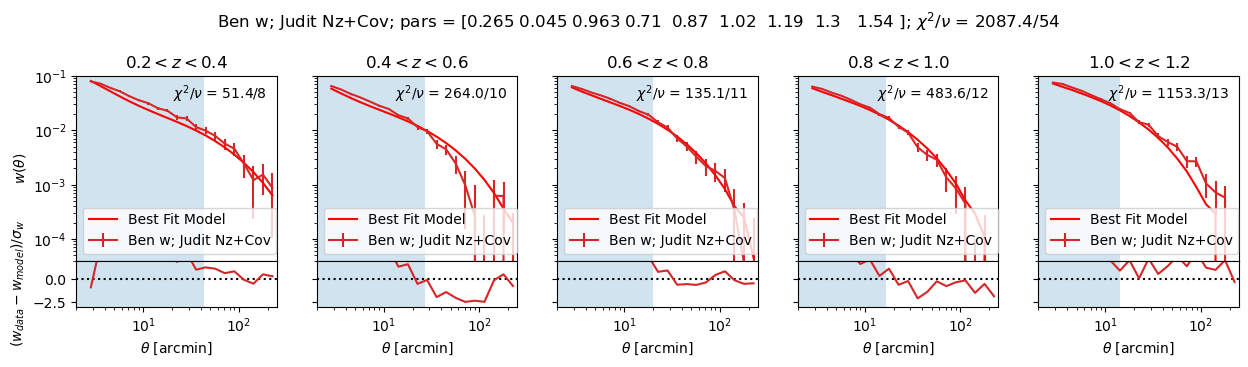

Fitting custom parameters.
Best Fits: [0.265  0.0448 0.963  0.71   0.87   1.02   1.19   1.3    1.54  ]


/Users/Ben/Desktop/Blending Project/helper_functions.py:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  inv_cov = np.array(


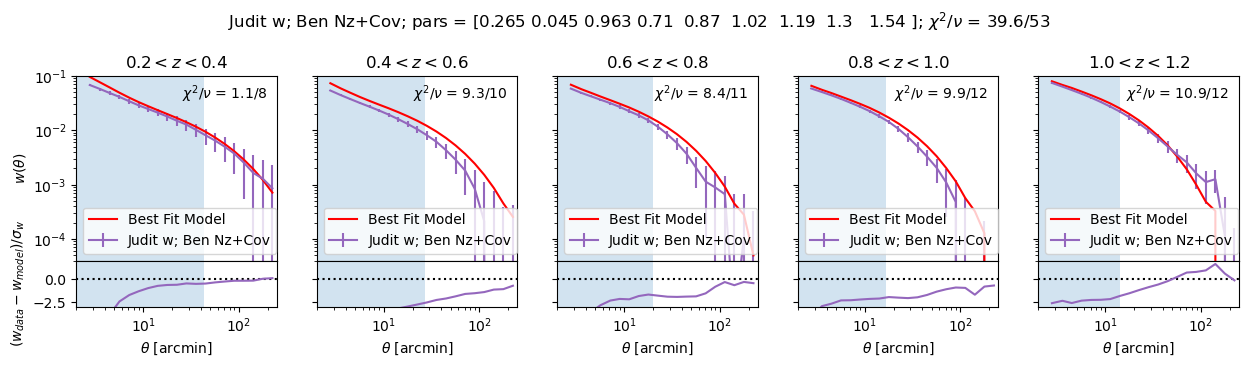

Fitting custom parameters.
Best Fits: [0.265  0.0448 0.963  0.71   0.87   1.02   1.19   1.3    1.54  ]


/Users/Ben/Desktop/Blending Project/helper_functions.py:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  inv_cov = np.array(


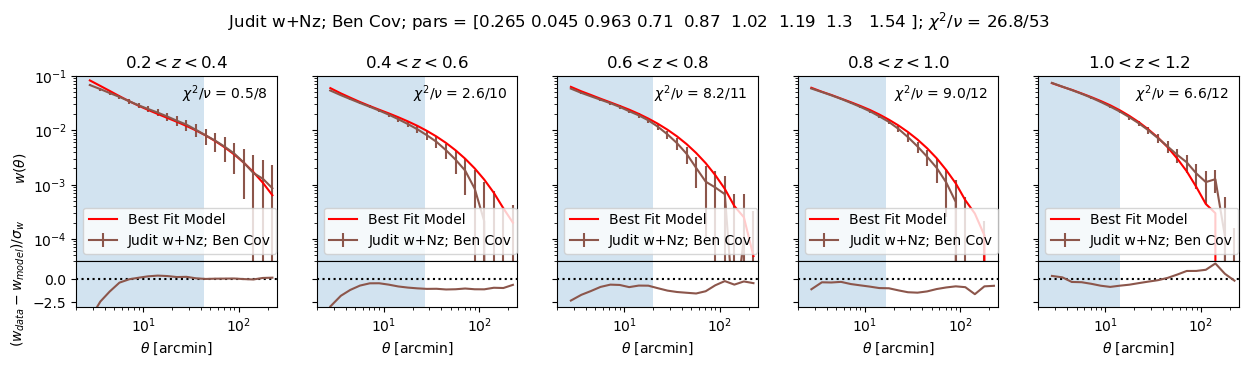

In [8]:
# Generate comparison plots with different combinations of w(theta), N(z), and covariance
plot_model_residual(judit_vector, None, model, 'Judit Data Vector', txp_angles, parnames, fit_vals=parr, color='C0')
plot_model_residual(ben_vector, None, model, 'Ben Data Vector', txp_angles, parnames, fit_vals=parr, color='C1')

test_data = [ben_vector[0], ben_vector[1], judit_vector[2]]
plot_model_residual(test_data, None, model, 'Ben w+Nz; Judit Cov', txp_angles, parnames, fit_vals=parr, color='C2')

test_data = [ben_vector[0], judit_vector[1], judit_vector[2]]
plot_model_residual(test_data, None, model, 'Ben w; Judit Nz+Cov', txp_angles, parnames, fit_vals=parr, color='C3')

test_data = [judit_vector[0], ben_vector[1], ben_vector[2]]
plot_model_residual(test_data, None, model, 'Judit w; Ben Nz+Cov', txp_angles, parnames, fit_vals=parr, color='C4')

test_data = [judit_vector[0], judit_vector[1], ben_vector[2]]
plot_model_residual(test_data, None, model, 'Judit w+Nz; Ben Cov', txp_angles, parnames, fit_vals=parr, color='C5')